In [51]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense,BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg


In [2]:
from google.colab import files

uploaded = files.upload()


Saving dogs_and_cats.zip to dogs_and_cats.zip


In [52]:
from zipfile import ZipFile

data_path = '/content/dogs_and_cats.zip'

with ZipFile(data_path, 'r') as zip:
	zip.extractall()



In [53]:
path = '/content/dogs_and_cats'
classes = os.listdir(path)
classes


['cats', 'dogs']

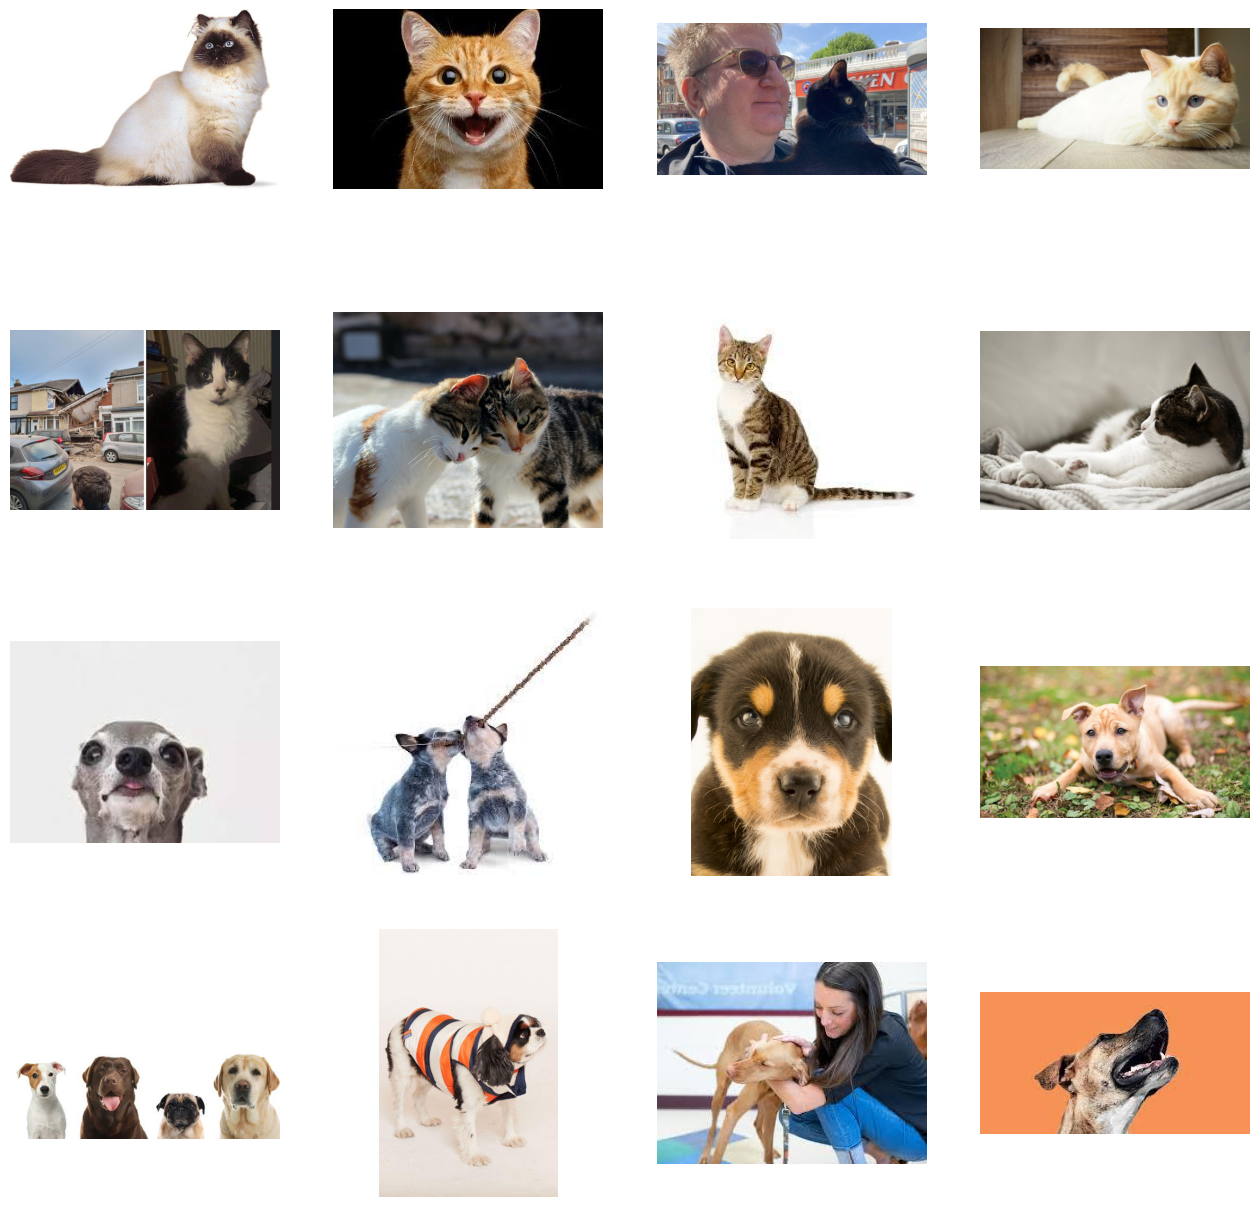

In [41]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

cat_dir = os.path.join('dogs_and_cats/cats')
dog_dir = os.path.join('dogs_and_cats/dogs')
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210

cat_images = [os.path.join(cat_dir, fname)
			for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
			for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
	sp = plt.subplot(4, 4, i+1)
	sp.axis('Off')

	img = mpimg.imread(img_path)
	plt.imshow(img)

plt.show()


In [54]:
base_direct = '/content/dogs_and_cats'

# Create datasets
train_datagen = image_dataset_from_directory(base_direct,
												image_size=(200,200),
												subset='training',
												seed = 1,
												validation_split=0.1,
												batch_size= 32)
test_datagen = image_dataset_from_directory(base_direct,
												image_size=(200,200),
												subset='validation',
												seed = 1,
												validation_split=0.1,
												batch_size= 32)


Found 697 files belonging to 2 classes.
Using 628 files for training.
Found 697 files belonging to 2 classes.
Using 69 files for validation.


In [55]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape = (200,200,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

 #layer 1
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# layer 2
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# layer 4
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Fully Connected layers
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer, used sigmoid because output has to lie between 0 and 1
model.add(Dense(1,activation='sigmoid'))

In [56]:

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])


In [57]:
history = model.fit(train_datagen,
		epochs=20,
		validation_data=test_datagen)


Epoch 1/20
20/20 [==============================] - 103s 5s/step - loss: 1.5824 - accuracy: 0.5207 - val_loss: 17.6539 - val_accuracy: 0.4783
Epoch 2/20
20/20 [==============================] - 93s 5s/step - loss: 0.6039 - accuracy: 0.6975 - val_loss: 7.5439 - val_accuracy: 0.4783
Epoch 3/20
20/20 [==============================] - 95s 5s/step - loss: 0.6036 - accuracy: 0.7229 - val_loss: 2.2024 - val_accuracy: 0.4638
Epoch 4/20
20/20 [==============================] - 92s 5s/step - loss: 0.4726 - accuracy: 0.7803 - val_loss: 1.5232 - val_accuracy: 0.5072
Epoch 5/20
20/20 [==============================] - 93s 5s/step - loss: 0.3451 - accuracy: 0.8471 - val_loss: 0.9389 - val_accuracy: 0.5362
Epoch 6/20
20/20 [==============================] - 96s 5s/step - loss: 0.2557 - accuracy: 0.9124 - val_loss: 1.0024 - val_accuracy: 0.5797
Epoch 7/20
20/20 [==============================] - 92s 5s/step - loss: 0.2211 - accuracy: 0.9188 - val_loss: 1.1241 - val_accuracy: 0.5652
Epoch 8/20
20/20 [

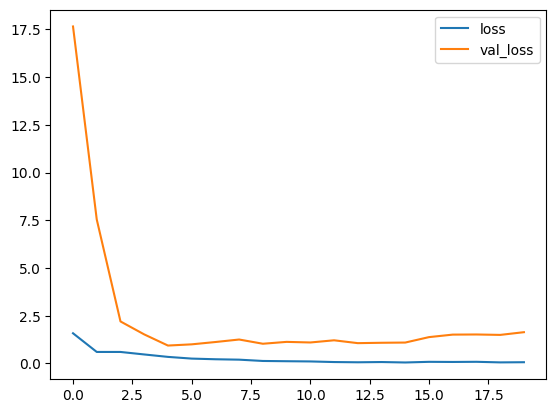

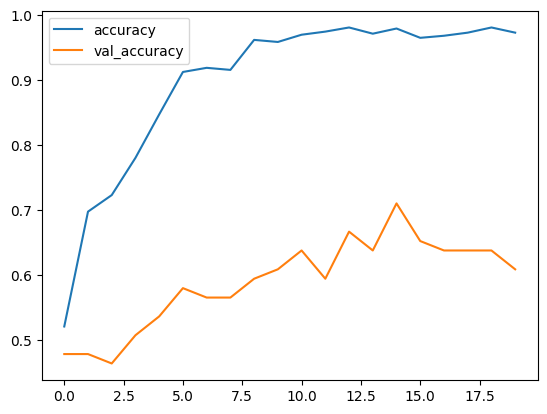

In [58]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()
